In [1]:
import pandas as pd

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In the cell bellow we visualize the first image in the training dataset to ensure the data was loaded correctly.

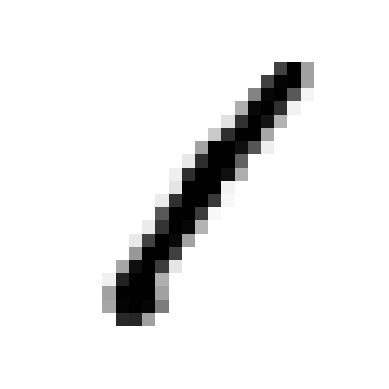

In [4]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

first_digit = train.iloc[0, 1:].values #locating first digit but skipping first column to avoid label 
plot_digit(first_digit)
plt.show()

Looks like the dataset was loaded correctly and the first digit appears to be a 1, but to avoid any uncertainty we can view the label.

In [5]:
train.iloc[0]

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

In [6]:
X_train = train.drop('label', axis = 1)
y_train = train['label']

Binary Classifier 

In [7]:
y_train_1 = (y_train == 1)

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(random_state=42)

In [9]:
first_digit_reshaped = first_digit.reshape(1, -1)
y_pred = sgd_clf.predict(first_digit_reshaped)
first_digit_df = pd.DataFrame(first_digit_reshaped, columns=X_train.columns)
print(y_pred)

[ True]


c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


Cross-Validation / Visualization of Why Accuracy is not always the best performance metric for a model

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_1, cv = 3, scoring = 'accuracy')

array([0.98735714, 0.98842857, 0.98671429])

98% accuracy may seem to indicate that we have found a fitting model for our use but there are some flaws with how this model is achieving its result. Since the system determines if a number is either a 1 or not a 1 then since a majority of the numbers in the dataset are not 1 it has most likley learned that it can guess false or not 1 for a majority of the dataset and be right in a majority of cases. The dummy classifier bellow further exemplifies this point.

Dummy Classifier 

In [11]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_1)
print(any(dummy_clf.predict(X_train)))

False


In [12]:
cross_val_score(dummy_clf, X_train, y_train_1, cv = 3, scoring = 'accuracy')

array([0.88842857, 0.8885    , 0.8885    ])

Confusion Matrix 

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv = 3)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_1, y_train_pred)
cm

array([[36908,   408],
       [  117,  4567]])

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_1, y_train_pred)

np.float64(0.9179899497487437)

In [16]:
recall_score(y_train_1, y_train_pred)

np.float64(0.9750213492741246)

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_1, y_train_pred)

np.float64(0.9456465472616213)

In [18]:
y_scores = sgd_clf.decision_function([first_digit])
y_scores

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([11357.70867683])

In [25]:
threshold = 12000
y_first_digit_pred = (y_scores > threshold)
y_first_digit_pred

array([False])

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_1, cv = 3, method = 'decision_function')

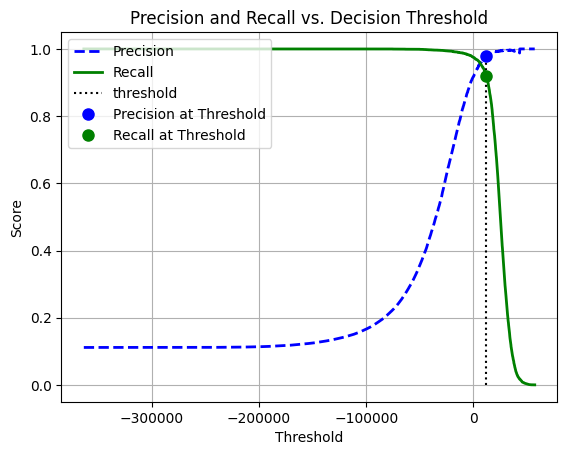

In [42]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision', linewidth = 2)
plt.plot(thresholds, recalls[:-1], '-g', label = 'Recall', linewidth = 2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label = "threshold")

# Plot intersection points as dots
threshold_index = np.argmin(np.abs(thresholds - threshold))
precision_at_threshold = precisions[threshold_index]
recall_at_threshold = recalls[threshold_index]
plt.plot(threshold, precision_at_threshold, 'bo', markersize=8, label="Precision at Threshold")
plt.plot(threshold, recall_at_threshold, 'go', markersize=8, label="Recall at Threshold")

plt.title("Precision and Recall vs. Decision Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()